步骤：<br>
1.读取数据;<br>
2.确定分析时间段;<br>
3.清洗数据（格式有误，重复值，缺失值，异常值）;<br>
4.数据分析维度（不同站点销售占比，不同月份各店铺销售情况，总销售额，销售额走势图，按周以及日为时间维度分析用户行为）;<br>
5.输出报告;

读取数据

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime


matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [30]:
#导入数据，需要转换编码格式
df = pd.read_csv(r'/Users/edz/Downloads/restore_order_list_202005201589948530896.csv',encoding='utf-8',index_col=None)
df

,创建时间,所属站点,店铺编号,店铺名称,会员编号,会员名称,交易日期,交易订单编号,交易币种,交易金额,数量,单价,商品名称,还原申报状态
0,\t2020-05-20 00:07:21.0,\tplatform/amazon/ZJapen,123,aaa,112,a公司,\t2020-05-19 16:59:00.0,503-9244602,\tJPY,1780.00,1,1780.00,\tMEGOO Surface Pro 3 液晶保護フィルム 2.5Dラウンドエッジ加工 全...,1
1,\t2020-05-20 00:07:21.0,\tplatform/amazon/ZJapen,124,aaa,112,a公司,\t2020-05-19 14:44:40.0,249-4480628,\tJPY,1780.00,1,1780.00,\tMEGOO Microsoft Surface Pro 7 保護フィルム 貼りやすい、気...,1
2,\t2020-05-20 00:07:21.0,\tplatform/amazon/ZJapen,125,aaa,112,a公司,\t2020-05-19 12:16:03.0,249-5913400,\tJPY,2280.00,1,2280.00,\tMEGOO Surface Book 2 保護フィルム 高精細 強化ガラス [9H高硬度...,1
3,\t2020-05-20 00:07:21.0,\tplatform/amazon/ZJapen,126,aaa,112,a公司,\t2020-05-19 11:26:44.0,503-2255000,\tJPY,1980.00,1,1980.00,\tMEGOO Surface Laptop 3/ Laptop 2 保護フィルム、貼りやす...,1
4,\t2020-05-20 00:07:21.0,\tplatform/amazon/ZJapen,127,aaa,112,a公司,\t2020-05-19 08:10:45.0,249-6679823,\tJPY,1980.00,1,1980.00,\tMEGOO Surface Laptop 3/ Laptop 2 保護フィルム、貼りやす...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,\t2020-04-10 00:08:39.0,\tplatform/amazon/ZEurope,10400,bbb,112,a公司,\t2019-10-12 09:11:23.0,202-8497126,\tGBP,13.77,1,13.77,\tMEGOO Surface Pro 6 Screen Protector 2018 Te...,1
10278,\t2020-04-10 00:08:39.0,\tplatform/amazon/ZEurope,10401,bbb,112,a公司,\t2019-10-11 15:30:25.0,204-7222718,\tGBP,13.77,1,13.77,\tMEGOO Surface Pro 6 Screen Protector 2018 Te...,1
10279,\t2020-04-10 00:08:39.0,\tplatform/amazon/ZEurope,10402,bbb,112,a公司,\t2019-10-11 04:48:47.0,026-4690768,\tGBP,13.77,1,13.77,\tMEGOO Surface Pro 6 Screen Protector 2018 Te...,1
10280,\t2020-04-10 00:08:39.0,\tplatform/amazon/ZEurope,10403,bbb,112,a公司,\t2019-10-10 22:46:32.0,204-2493929,\tGBP,13.77,1,13.77,\tMEGOO Surface Pro 6 Screen Protector 2018 Te...,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 14 columns):
创建时间      10282 non-null object
所属站点      10282 non-null object
店铺编号      10282 non-null int64
店铺名称      10282 non-null object
会员编号      10282 non-null int64
会员名称      10282 non-null object
交易日期      10282 non-null object
交易订单编号    10282 non-null object
交易币种      10282 non-null object
交易金额      10282 non-null float64
数量        10282 non-null int64
单价        10282 non-null float64
商品名称      10282 non-null object
还原申报状态    10282 non-null int64
dtypes: float64(2), int64(4), object(8)
memory usage: 1.1+ MB


In [32]:
df.describe()

,店铺编号,会员编号,交易金额,数量,单价,还原申报状态
count,10282.000000,10282.0,10282.000000,10282.000000,10282.000000,10282.0
mean,5263.500000,112.0,969.358777,1.062926,961.007517,1.0
std,2968.302068,0.0,1317.823894,0.597655,1295.342658,0.0
min,123.000000,112.0,0.180000,0.000000,9.870000,1.0
25%,2693.250000,112.0,15.780000,1.000000,15.770000,1.0
50%,5263.500000,112.0,36.510000,1.000000,33.560000,1.0
75%,7833.750000,112.0,1780.000000,1.000000,1780.000000,1.0
max,10404.000000,112.0,35110.000000,24.000000,34600.000000,1.0


确定分析时间段

In [43]:
#交易日期字段转换为日期格式
df['交易日期'] = pd.to_datetime(df['交易日期'])
print(df['交易日期'].max())
print(df['交易日期'].min())

#分析2020-1至4月数据
start_date = datetime.datetime(2020,1,1,0,0,0)
end_date = datetime.datetime(2020,4,30,23,59,59)
df.drop(index=df[df['交易日期'] < start_date ].index,inplace=True)
df.drop(index=df[df['交易日期'] > end_date ].index,inplace=True)


2020-04-30 23:58:59
2019-10-03 04:51:48


清洗数据

In [44]:
#df.info()可以看出总记录数10282条，每个字段不存在空值
#因为数量不能为0，数量为0的订单无意义，进行删除
#print(df[df['数量'] == 0])
df.drop(index=df[df['数量'] == 0].index,inplace=True)
df.describe()

,店铺编号,会员编号,交易金额,数量,单价,还原申报状态,新交易金额,月份
count,6957.000000,6957.0,6957.000000,6957.000000,6957.000000,6957.0,6957.000000,6957.000000
mean,5129.019549,112.0,1105.831491,1.059365,1095.664906,1.0,19.269622,2.786546
std,2397.514862,0.0,1333.902241,0.547681,1304.632027,0.0,11.398846,1.130376
min,490.000000,112.0,0.180000,1.000000,9.870000,1.0,0.217746,1.000000
25%,3160.000000,112.0,16.780000,1.000000,15.780000,1.0,16.554000,2.000000
50%,4934.000000,112.0,1180.000000,1.000000,1180.000000,1.0,16.657569,3.000000
75%,7226.000000,112.0,1780.000000,1.000000,1780.000000,1.0,19.170000,4.000000
max,9271.000000,112.0,35110.000000,20.000000,34600.000000,1.0,326.523000,4.000000


In [45]:
#查看订单ID是否重复
df[df['交易订单编号'].duplicated() == True]
#删除重复订单
df.drop(index = df[df['交易订单编号'].duplicated() == True].index,inplace=True)

In [46]:
#格式调整
print(df['所属站点'].unique())
df.loc[df[df['所属站点']=='\tplatform/amazon/ZNAmerica'].index,'所属站点'] = '亚马逊北美站'
df.loc[df[df['所属站点']=='\tplatform/amazon/ZJapen'].index,'所属站点'] = '亚马逊日本站'
df.loc[df[df['所属站点']=='\tplatform/amazon/ZEurope'].index,'所属站点'] = '亚马逊欧洲站'
df['所属站点'].unique()

['亚马逊欧洲站' '亚马逊日本站' '亚马逊北美站']


array(['亚马逊欧洲站', '亚马逊日本站', '亚马逊北美站'], dtype=object)

In [47]:
#删除单元格内空白占位符
print(df['店铺名称'])
print(df['交易币种'])
print(df['商品名称'])
df['店铺名称'] = df['店铺名称'].str.strip()
df['交易币种'] = df['交易币种'].str.strip()
df['商品名称'] = df['商品名称'].str.strip()

367     bbb
491     bbb
612     bbb
613     bbb
614     bbb
       ... 
9144    bbb
9145    bbb
9146    bbb
9147    bbb
9148    bbb
Name: 店铺名称, Length: 6957, dtype: object
367     EUR
491     GBP
612     GBP
613     GBP
614     GBP
       ... 
9144    EUR
9145    EUR
9146    EUR
9147    EUR
9148    EUR
Name: 交易币种, Length: 6957, dtype: object
367     MEGOO Surface Pro 7 Screenschutzfolie [Geh?rte...
491     [2 pack]Adeway Screen Protector For MacBook Pr...
612     [2 pack]Adeway Screen Protector For MacBook Pr...
613     [2 pack]MEGOO Tempered Glass Screen Protector ...
614     MEGOO Screen Protector For Apple iPad 2 3 4 Ea...
                              ...                        
9144    MEGOO Surface 3 Screenschutzfolie [Geh?rtetes ...
9145    [2 Stück] Adeway Displayschutzfolie Kompatibel...
9146    Adeway Surface Book 2 Displayschutzfolie 15 Zo...
9147    MEGOO Panzerglasfolie Schutzfolie für das Neue...
9148    Adeway [2 Stück] Microsoft Surface Book 2 Schu...
Name: 商品名称, Length

In [48]:
#币种转换，统一成美元
#查询日元兑换美元汇率为0.0093，欧元兑换美元汇率为1.0821，英镑兑换美元汇率为1.2097
print(df['交易币种'].unique())
def change(x,y):
    if x == 'USD':
        y = y
        x = x
    elif x == 'JPY':
        y = y * 0.0093
        x = 'USD'
    elif x == 'GBP':
        y = y * 1.2097
        x = 'USD'
    else:
        y = y * 1.0821
        x = 'USD'
    return y
df['新交易金额'] = df.apply(lambda row : change(row['交易币种'],row['交易金额']),axis=1)
df

['EUR' 'GBP' 'JPY' 'USD']


,创建时间,所属站点,店铺编号,店铺名称,会员编号,会员名称,交易日期,交易订单编号,交易币种,交易金额,数量,单价,商品名称,还原申报状态,新交易金额,月份
367,\t2020-05-11 00:11:58.0,亚马逊欧洲站,490,bbb,112,a公司,2020-04-28 21:34:42,306-7041946,EUR,16.78,1,16.78,MEGOO Surface Pro 7 Screenschutzfolie [Geh?rte...,1,18.157638,4
491,\t2020-05-08 00:09:37.0,亚马逊欧洲站,614,bbb,112,a公司,2020-04-30 17:08:17,203-3140358,GBP,18.99,1,18.99,[2 pack]Adeway Screen Protector For MacBook Pr...,1,22.972203,4
612,\t2020-05-07 00:21:45.0,亚马逊欧洲站,735,bbb,112,a公司,2020-04-30 21:11:50,204-0245152,GBP,18.99,1,18.99,[2 pack]Adeway Screen Protector For MacBook Pr...,1,22.972203,4
613,\t2020-05-07 00:21:45.0,亚马逊欧洲站,736,bbb,112,a公司,2020-04-30 17:40:51,204-0622723,GBP,15.77,1,15.77,[2 pack]MEGOO Tempered Glass Screen Protector ...,1,19.076969,4
614,\t2020-05-07 00:21:45.0,亚马逊欧洲站,737,bbb,112,a公司,2020-04-29 20:34:41,205-4407527,GBP,12.77,1,12.77,MEGOO Screen Protector For Apple iPad 2 3 4 Ea...,1,15.447869,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9144,\t2020-04-10 00:29:08.0,亚马逊欧洲站,9267,bbb,112,a公司,2020-01-02 19:24:34,302-4350747,EUR,13.90,1,13.90,MEGOO Surface 3 Screenschutzfolie [Geh?rtetes ...,1,15.041190,1
9145,\t2020-04-10 00:29:08.0,亚马逊欧洲站,9268,bbb,112,a公司,2020-01-02 19:12:56,028-3061968,EUR,17.78,1,17.78,[2 Stück] Adeway Displayschutzfolie Kompatibel...,1,19.239738,1
9146,\t2020-04-10 00:29:08.0,亚马逊欧洲站,9269,bbb,112,a公司,2020-01-02 17:55:17,304-3669133,EUR,26.99,1,26.99,Adeway Surface Book 2 Displayschutzfolie 15 Zo...,1,29.205879,1
9147,\t2020-04-10 00:29:08.0,亚马逊欧洲站,9270,bbb,112,a公司,2020-01-02 03:30:53,306-5780308,EUR,15.05,1,15.05,MEGOO Panzerglasfolie Schutzfolie für das Neue...,1,16.285605,1


进行数据分析

In [49]:
#数据总揽
#分布站点
print(df['所属站点'].unique())
#总店铺数
print(df['店铺名称'].unique(),df['店铺名称'].unique().size)
#总订单数
print(df['交易订单编号'].unique().size)
#总销售额
print(str(round(df['新交易金额'].sum(),2)) + 'USD')

['亚马逊欧洲站' '亚马逊日本站' '亚马逊北美站']
['bbb' 'aaa' 'ccc'] 3
6957
134058.76USD


小结：
客户共有'亚马逊北美站'，'亚马逊日本站'，'亚马逊欧洲站'站点店铺，共3个店铺，2020年1至4月总销售额为134058.76USD；

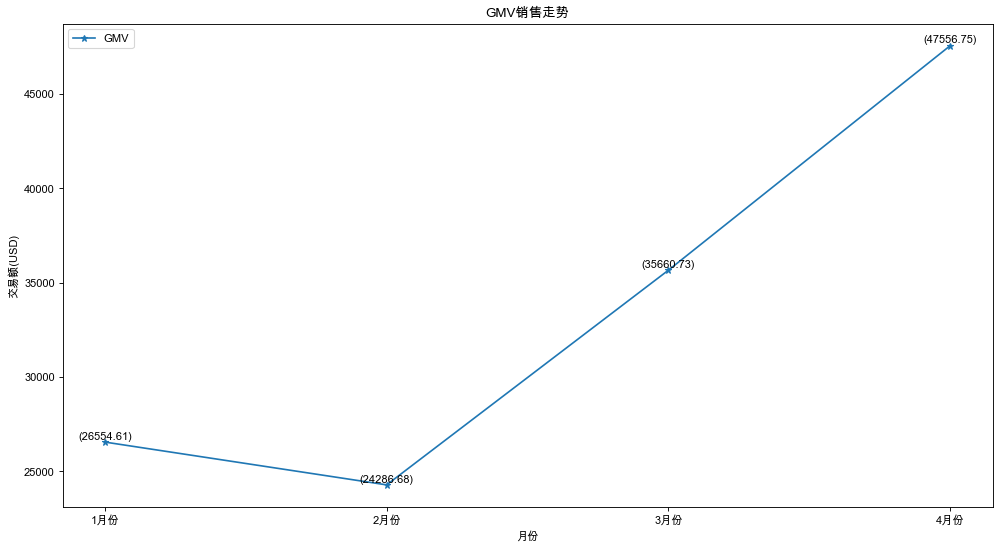

In [50]:
#销售额走势图
#新建月份列
df['月份'] = df['交易日期'].dt.month
df
gmv_groupby = df.groupby('月份')['新交易金额'].sum()
x1 = gmv_groupby.index
y1 = gmv_groupby.values
plt.rcParams["font.family"] = 'Arial Unicode MS'
#设置x坐标轴标签
x1_label = ['{}月份'.format(i) for i in x1]
plt.figure(figsize=(15,8),dpi=80)
plt.xlabel('月份')
plt.ylabel('交易额(USD)')
#画图
plt.plot(x1_label,y1,label='GMV',marker='*')
#设置每个坐标值
for a,b in zip(x1,y1):
    plt.text(a-1,b+30,'(%.2f)'%(b),ha='center',va='bottom')
plt.legend()
plt.title('GMV销售走势')
plt.show()

小结：<br>
1.由于春节过年原因，客户2月销量较低；<br>
2.整体销量呈向上增长趋势；

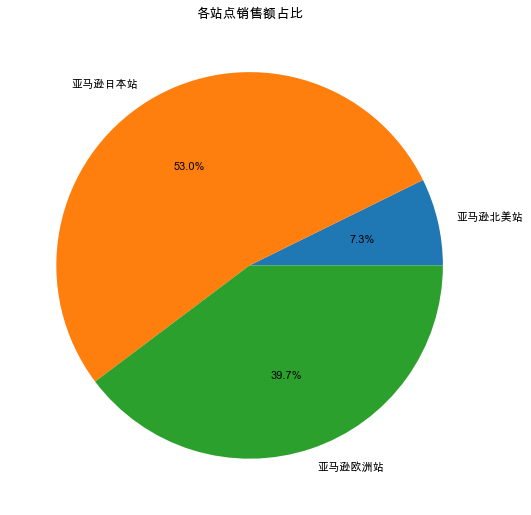

In [51]:
#不同站点销售占比
web_group = df.groupby('所属站点')['新交易金额'].sum()
web_group
plt.rcParams["font.family"] = 'Arial Unicode MS'  #mac显示中文字体
#web_group.plot.pie(figsize=(20,8),labels=web_group.index,autopct="%1.1f%%")
plt.figure(figsize=(20,8),dpi=80)
plt.pie(web_group.values,labels=web_group.index,autopct='%1.1f%%',shadow=False)
plt.title('各站点销售额占比')
plt.show()

小结：<br>
1.客户销售收入来源最大的站点是'亚马逊日本站'，其次是'亚马逊欧洲站'，可在这两个站点增加资金投入，特别是广告投入这块可以集中投入，提升品牌知名度；<br>
2.在'亚马逊北美站'销量较低，可在运营策略及产品类目上寻求创新；

3
[4 3 2 1]


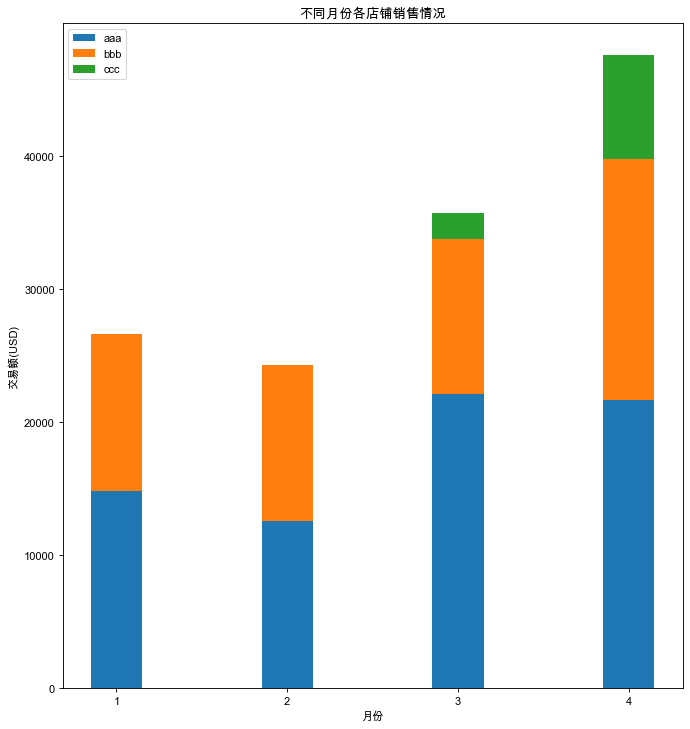

In [55]:
#不同月份各店铺销售情况
print(df['店铺名称'].unique().size)
#查看月份是否为连续数据
print(df['月份'].unique())
#设置x,y值
x = df.groupby(['店铺名称','月份'])['新交易金额'].sum()
x_items_dict1 = {}
x_items_dict2 = {}
x_items_dict3 = {}

#初始化第一个字典内容
for mo in range(df['月份'].unique().min(),df['月份'].unique().max()+1):
    x_items_dict1[mo] = 0
#Series转换为list格式
x_items_list = list(x.items())
#字典copy操作，避免影响原始值
x_items_dict2 = x_items_dict1.copy()
#print(x_items_dict2)

#将组合数据转成list后再做字典转换
for j in range(len(x_items_list)):
    if j < len(x_items_list) - 1:
        if x_items_list[j][0][0] != x_items_list[j+1][0][0]:
            x_items_dict2[x_items_list[j][0][1]] = x_items_list[j][1]
            x_items_dict3[x_items_list[j][0][0]] = x_items_dict2.copy()
            x_items_dict2 = x_items_dict1.copy()
            #x_items_dict3 = {}
        else:
            x_items_dict2[x_items_list[j][0][1]] = x_items_list[j][1]
            #x_items_dict3[x_items_list[j][0][0]] = x_items_dict2
            #x_items_dict3 = {}
    else:
            x_items_dict2[x_items_list[j][0][1]] = x_items_list[j][1]
            x_items_dict3[x_items_list[j][0][0]] = x_items_dict2.copy()

#设置大小
plt.figure(figsize=(10,11),dpi=80)
#初始化bottom值
y2 = np.array([0,0,0,0])
#遍历循环所有店铺，x轴为月份，每个店铺的销售额对应y值
for i in x_items_dict3.keys():
    x1 = list(x_items_dict3.values())[0].keys()
    y1 = np.array(list(x_items_dict3[i].values()))
    plt.bar(x1, y1, bottom=y2, label=i,width=0.3)
    y2 = y2 + y1
plt.title('不同月份各店铺销售情况')
plt.xticks(range(1,len(x1)+1),x1)
plt.xlabel('月份')
plt.ylabel('交易额(USD)')
plt.legend()
plt.show()


小结：<br>
1.销量最大的店铺为：aaa，可对这个店铺加大促销策略；<br>
2.店铺ccc为3月新投入店铺，需迅速融入市场，在3-4月呈现销量递增趋势；

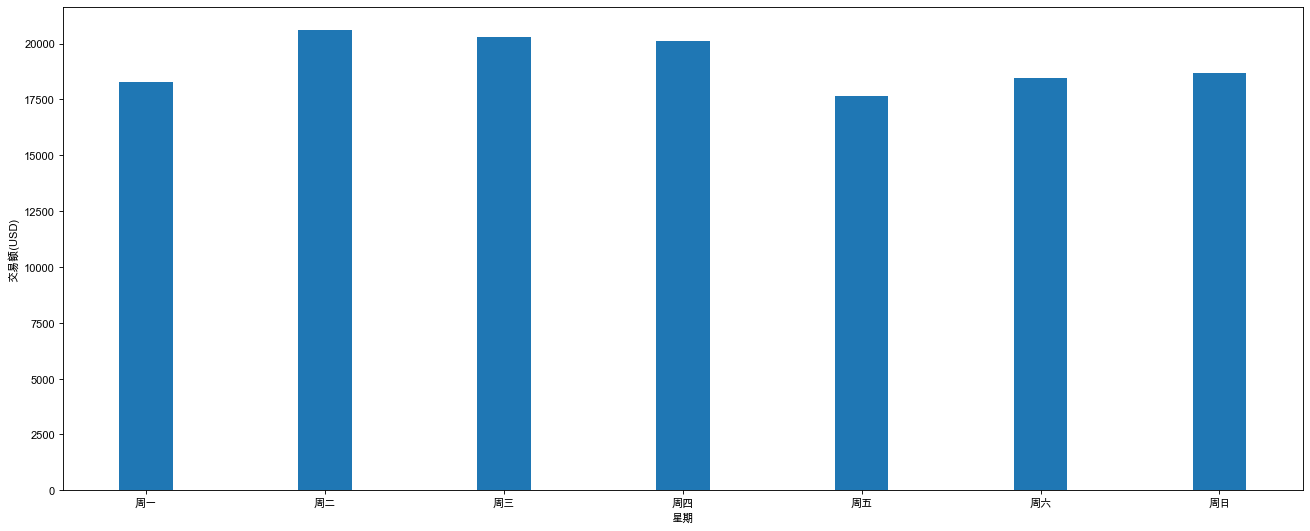

In [56]:
#研究时间字段，以周几为单位分析销售情况
#生成星期列，0代表星期一
df['星期'] = df['交易日期'].dt.dayofweek
week_groupby = df.groupby('星期')['新交易金额'].sum()
week_groupby
#绘制柱状图
x1 = week_groupby.index
y1 = week_groupby.values
x1_label = ['周一','周二','周三','周四','周五','周六','周日']
plt.figure(figsize=(20,8),dpi=80)
plt.xticks(range(len(x1_label)),x1_label)
plt.xlabel('星期')
plt.ylabel('交易额(USD)')
plt.bar(x1,y1,width=0.3)
plt.show()

小结：<br>
1.周二至周四的交易量比较集中，此期间应保证平台运营的正常以及供货正常；<br>
2.周一、周五交易量较低，可以安排工作人员在此期间休息；

367    2020-04-28 21:30:00
491    2020-04-30 17:00:00
612    2020-04-30 21:00:00
613    2020-04-30 17:30:00
614    2020-04-29 20:30:00
               ...        
9144   2020-01-02 19:00:00
9145   2020-01-02 19:00:00
9146   2020-01-02 17:30:00
9147   2020-01-02 03:30:00
9148   2020-01-02 03:00:00
Name: 交易日期, Length: 6957, dtype: datetime64[ns]


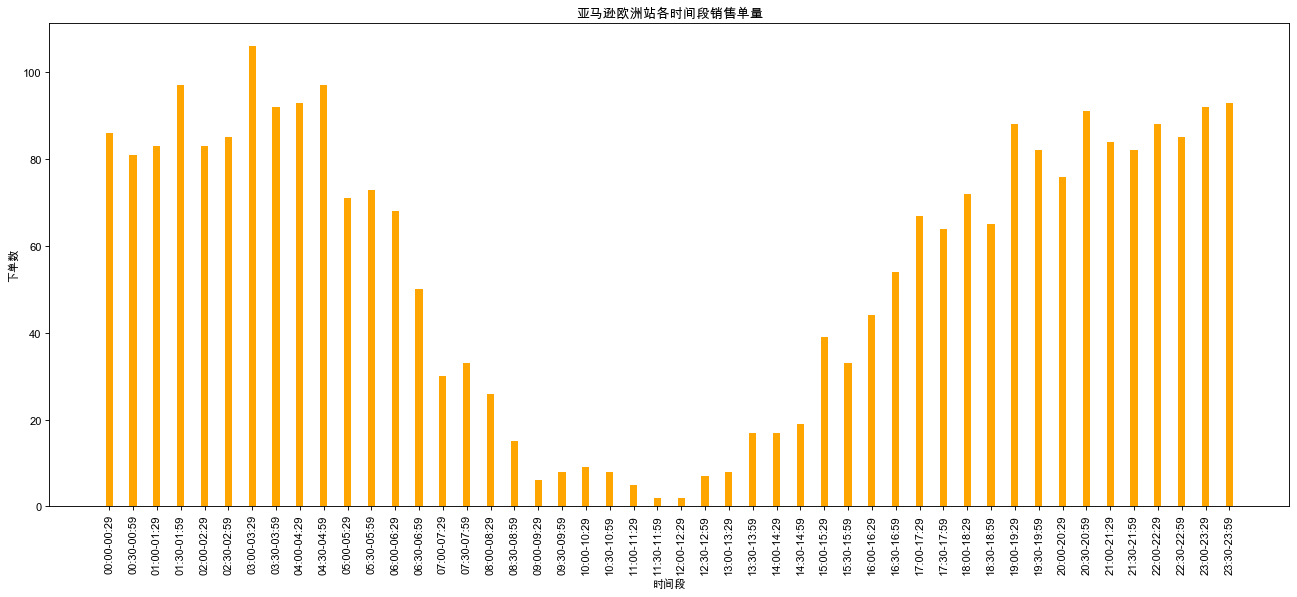

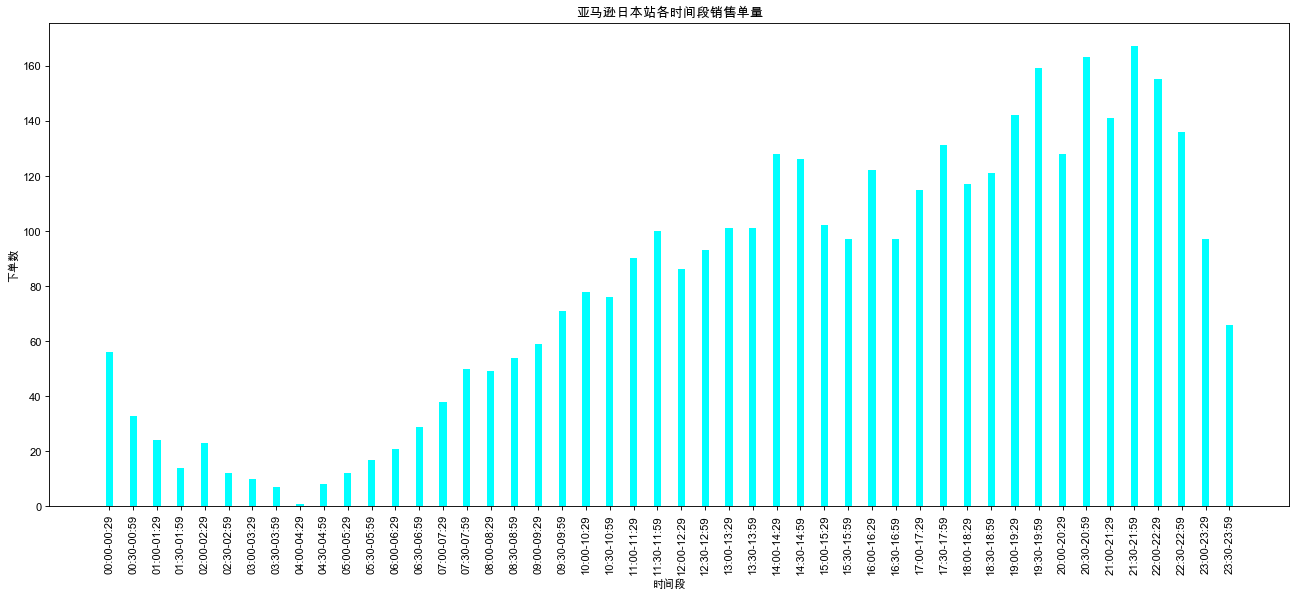

In [67]:
#设置时间周期
time = df['交易日期'].dt.floor('30T')
print(time)
#划分时间区间
df['时间'] = time.dt.strftime('%H:%M') + '-' + (time + pd.Timedelta(29 * 60, unit='s')).dt.strftime('%H:%M')

#分开欧洲站与日本站数据分析
df_ouzhou = df[df['所属站点']=='亚马逊欧洲站'].copy()
df_riben = df[df['所属站点']=='亚马逊日本站'].copy()

#设置x，y值
time_groupby_ouzhou = df_ouzhou.groupby('时间')['交易订单编号'].count()
time_groupby_riben = df_riben.groupby('时间')['交易订单编号'].count()
x1 = time_groupby_ouzhou.index
x2 = time_groupby_riben.index
y1 = time_groupby_ouzhou.values
y2 = time_groupby_riben.values

#画图
plt.figure(figsize=(20,8),dpi=80)
plt.xticks(range(len(x1)),x1,rotation=90)
plt.xlabel('时间段')
plt.ylabel('下单数')
plt.bar(x1,y1,width=0.3,color=['orange'])
plt.title('亚马逊欧洲站各时间段销售单量')
plt.show()

plt.figure(figsize=(20,8),dpi=80)
plt.xticks(range(len(x2)),x2,rotation=90)
plt.xlabel('时间段')
plt.ylabel('下单数')
plt.bar(x2,y2,width=0.3,color=['cyan'])
plt.title('亚马逊日本站各时间段销售单量')
plt.show()



小结：<br>1.亚马逊欧洲站：6点至17点之间销售订单数量较低，这段时间对应的是欧洲地区的23点至次日10点，属于正常休息时间段，而3点至5点销售订单数量达到最高峰，对应的是欧洲地区的20点至22点；<br>
2.亚马逊日本站：0点9点交易订单较低，在19点至23点之间交易最为集中，21:30-21:59达到一日内最高峰；<br>
3.从两个站点下单时间的数量分布可以看出，客群以上班族客户为主，交易高峰期集中在当地时间的20点至22点之间；